In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob
import KMeansClustering as kmc
from sklearn.decomposition import PCA

In [2]:
group01_1_train=glob("group01_1/group01/Train/*.png")
group01_1_train

['group01_1/group01/Train/106.png',
 'group01_1/group01/Train/107.png',
 'group01_1/group01/Train/108.png',
 'group01_1/group01/Train/109.png',
 'group01_1/group01/Train/110.png',
 'group01_1/group01/Train/111.png',
 'group01_1/group01/Train/112.png',
 'group01_1/group01/Train/113.png',
 'group01_1/group01/Train/114.png',
 'group01_1/group01/Train/115.png',
 'group01_1/group01/Train/116.png',
 'group01_1/group01/Train/17.png',
 'group01_1/group01/Train/18.png',
 'group01_1/group01/Train/19.png',
 'group01_1/group01/Train/20.png',
 'group01_1/group01/Train/21.png',
 'group01_1/group01/Train/22.png',
 'group01_1/group01/Train/23.png',
 'group01_1/group01/Train/24.png',
 'group01_1/group01/Train/25.png',
 'group01_1/group01/Train/26.png',
 'group01_1/group01/Train/27.png',
 'group01_1/group01/Train/28.png',
 'group01_1/group01/Train/29.png',
 'group01_1/group01/Train/30.png',
 'group01_1/group01/Train/31.png',
 'group01_1/group01/Train/32.png',
 'group01_1/group01/Train/33.png',
 'group01

In [3]:

group01_1_test  =glob("group01_1/group01/Test/*.png")
group01_1_test  

['group01_1/group01/Test/52.png',
 'group01_1/group01/Test/57.png',
 'group01_1/group01/Test/92.png']

In [4]:
ls=group01_1_train+group01_1_test
ls

['group01_1/group01/Train/106.png',
 'group01_1/group01/Train/107.png',
 'group01_1/group01/Train/108.png',
 'group01_1/group01/Train/109.png',
 'group01_1/group01/Train/110.png',
 'group01_1/group01/Train/111.png',
 'group01_1/group01/Train/112.png',
 'group01_1/group01/Train/113.png',
 'group01_1/group01/Train/114.png',
 'group01_1/group01/Train/115.png',
 'group01_1/group01/Train/116.png',
 'group01_1/group01/Train/17.png',
 'group01_1/group01/Train/18.png',
 'group01_1/group01/Train/19.png',
 'group01_1/group01/Train/20.png',
 'group01_1/group01/Train/21.png',
 'group01_1/group01/Train/22.png',
 'group01_1/group01/Train/23.png',
 'group01_1/group01/Train/24.png',
 'group01_1/group01/Train/25.png',
 'group01_1/group01/Train/26.png',
 'group01_1/group01/Train/27.png',
 'group01_1/group01/Train/28.png',
 'group01_1/group01/Train/29.png',
 'group01_1/group01/Train/30.png',
 'group01_1/group01/Train/31.png',
 'group01_1/group01/Train/32.png',
 'group01_1/group01/Train/33.png',
 'group01

In [5]:
len(plt.imread(ls[0]))

512

In [6]:
X = [plt.imread(file).flatten() for file in ls]
X = np.array(X)
X

array([[0.49019608, 0.6666667 , 0.68235296, ..., 0.6745098 , 0.6745098 ,
        0.5058824 ],
       [0.52156866, 0.69411767, 0.6901961 , ..., 0.69411767, 0.6901961 ,
        0.52156866],
       [0.5137255 , 0.67058825, 0.6666667 , ..., 0.68235296, 0.6745098 ,
        0.50980395],
       ...,
       [0.4745098 , 0.64705884, 0.6392157 , ..., 0.654902  , 0.65882355,
        0.47843137],
       [0.5137255 , 0.68235296, 0.68235296, ..., 0.6745098 , 0.68235296,
        0.5137255 ],
       [0.5411765 , 0.7019608 , 0.69411767, ..., 0.6862745 , 0.6862745 ,
        0.52156866]], dtype=float32)

In [7]:
pca = PCA(n_components=2) 
X= pca.fit_transform(X)
X

array([[ 15.240756  ,  10.345004  ],
       [  7.6486354 , -10.200418  ],
       [  7.9362044 ,   2.5773475 ],
       [  1.8564647 ,  -2.646595  ],
       [  8.143229  ,   0.45608866],
       [  5.872395  ,  12.957972  ],
       [  1.7203324 ,  -2.1011512 ],
       [ 12.562767  ,  -1.4408998 ],
       [  8.233634  ,  -3.1038413 ],
       [  6.697069  ,  -2.0701993 ],
       [ 20.932957  ,  14.231449  ],
       [-10.89005   ,  16.476475  ],
       [  5.604405  , -14.9445095 ],
       [ 13.413099  ,  -8.078128  ],
       [  0.828545  , -11.299658  ],
       [  8.836125  ,   4.6557865 ],
       [-10.478332  ,   5.4475365 ],
       [-10.134969  ,  10.964255  ],
       [ 16.899656  , -25.344286  ],
       [-17.840366  , -15.343274  ],
       [  0.0590873 , -10.112349  ],
       [ 19.582571  ,  -2.9715168 ],
       [ -3.2078707 ,   0.34127182],
       [-19.262766  , -15.087187  ],
       [ -9.929664  , -10.896706  ],
       [ 17.265484  ,  23.914104  ],
       [  2.0586123 ,  -4.1032853 ],
 

Covariance Matrix:
[[ 1.71243290e+02 -4.18586794e-06]
 [-4.18586794e-06  1.40448710e+02]]

Mean of the data:
[-1.0793171e-05  4.3990120e-05]
Converged in 4 iterations!


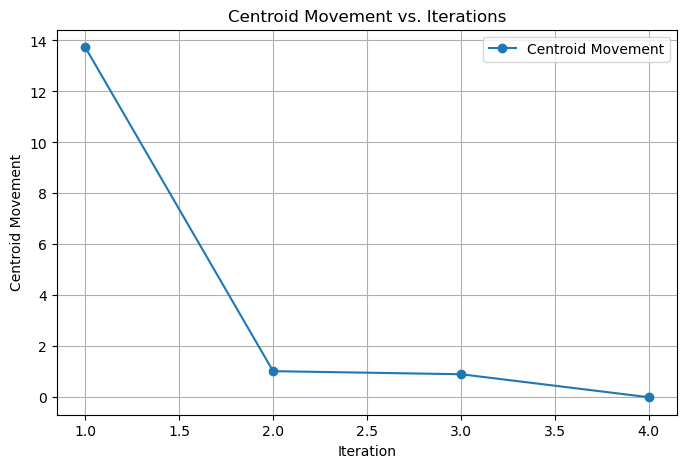

In [8]:

centroidEuclid,idxEuclid=kmc.KMeansClustering(X,3,100,False)

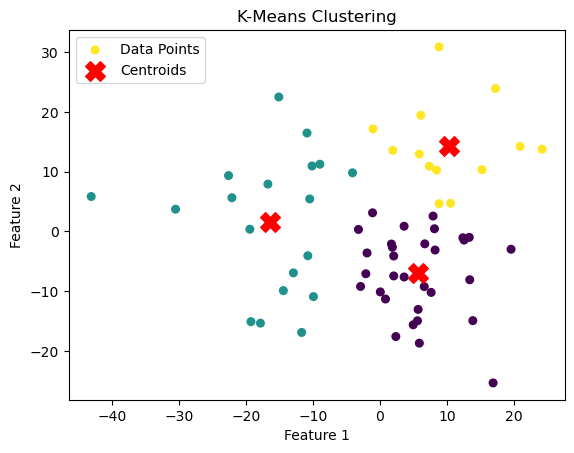

In [9]:


plt.scatter(X[:, 0], X[:, 1], c=idxEuclid, cmap='viridis', s=30, label='Data Points')
plt.scatter(centroidEuclid[:, 0], centroidEuclid[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Covariance Matrix:
[[ 1.71243290e+02 -4.18586794e-06]
 [-4.18586794e-06  1.40448710e+02]]

Mean of the data:
[-1.0793171e-05  4.3990120e-05]
Converged in 5 iterations!


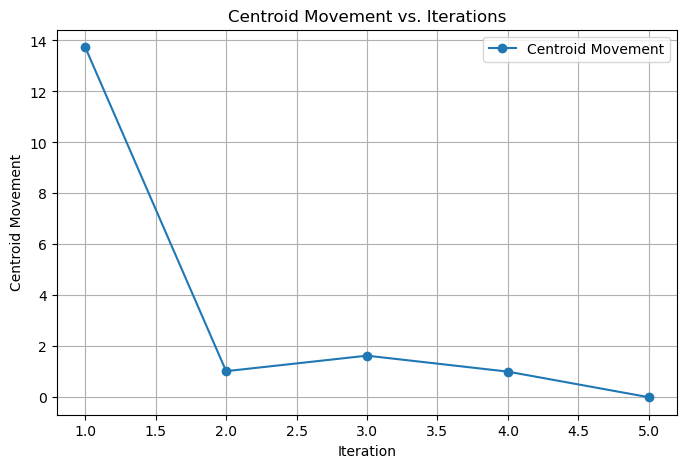

In [10]:

centroidma,idxma=kmc.KMeansClustering(X,3,100,True)

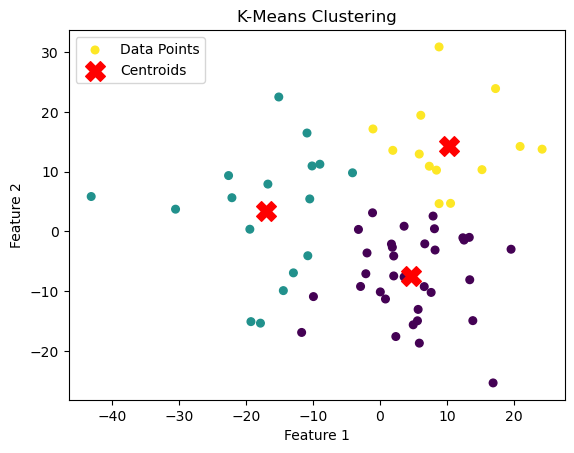

In [11]:

plt.scatter(X[:, 0], X[:, 1], c=idxma, cmap='viridis', s=30, label='Data Points')
plt.scatter(centroidma[:, 0], centroidma[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

<class 'numpy.ndarray'>


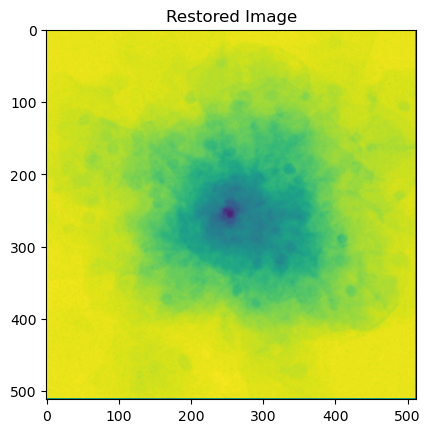

In [19]:
p=centroidEuclid[0]
tp=pca.inverse_transform(p)
print(type(tp))
restored_image =tp.reshape(512,512)
plt.imshow(restored_image)
plt.title("Restored Image")
plt.show()

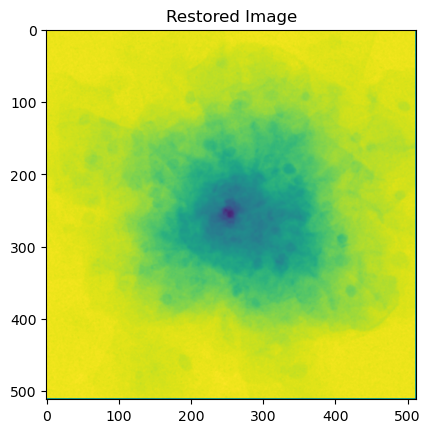

In [13]:

p=centroidma[0]
tp=pca.inverse_transform(p)
restored_image =tp.reshape(512,512)
plt.imshow(restored_image)
plt.title("Restored Image")
plt.show()

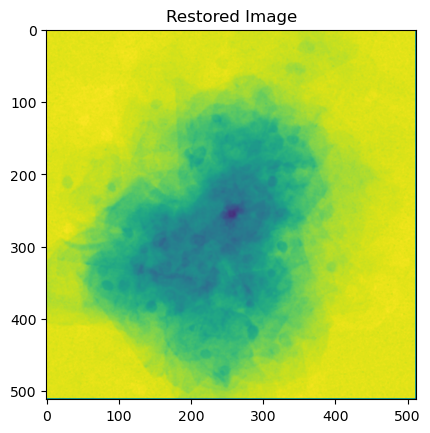

In [14]:

p=centroidEuclid[1]
tp=pca.inverse_transform(p)

restored_image =tp.reshape(512,512)
plt.imshow(restored_image)
plt.title("Restored Image")
plt.show()

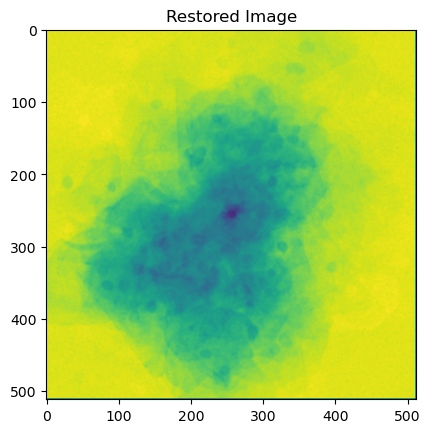

In [15]:

p=centroidma[1]
tp=pca.inverse_transform(p)

restored_image =tp.reshape(512,512)
plt.imshow(restored_image)
plt.title("Restored Image")
plt.show()

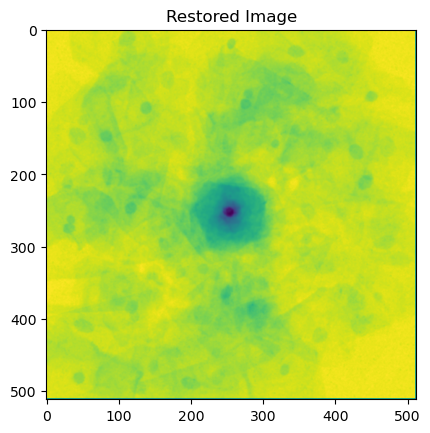

In [16]:

p=centroidEuclid[2]
tp=pca.inverse_transform(p)

restored_image =tp.reshape(512,512)
plt.imshow(restored_image)
plt.title("Restored Image")
plt.show()

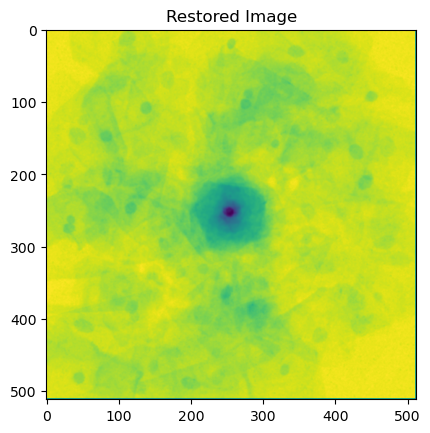

In [17]:

p=centroidma[2]
tp=pca.inverse_transform(p)

restored_image =tp.reshape(512,512)
plt.imshow(restored_image)
plt.title("Restored Image")
plt.show()